# [Selected Problems in Machine Learning (NPFL097)](https://ufal.mff.cuni.cz/courses/npfl097)

In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import segmentation
%matplotlib inline
import numpy as np


-967491.5784282564


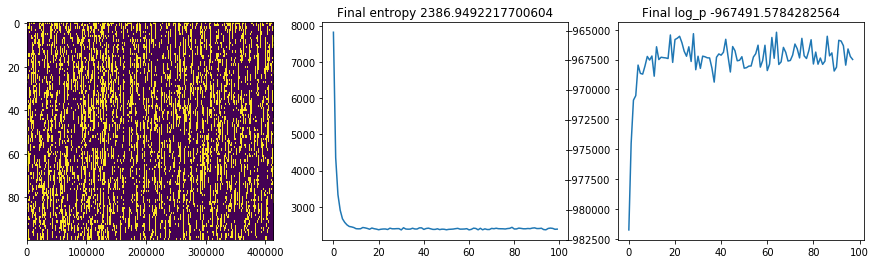

'o ra lt ernativ ely asop posi ngaut hor i tyinthe conduc tofhum anrel ationsp ropone ntsofanarchis mk n owna sanarchis tsadv ocate sta telesss ocieties astheonlym oralf ormofs o cia l organi z ationth erearem an yty pesand tr aditionso f a nar chismno tallo fwhicha re mutuall yexc lusivea narchist school softho u ghtcand if fe rfun damen tall ys up po rti ng anyt hi ng f romex trem eindivi dualism t ocomplet ecollec t ivisman archismi s o f t en cons i d eredto b earad icalle ftwi n gid eolo g yandmuc h o fanar ch istec onomics andanarchis tlegal p h il osophyr e f lecta ntist atisti n terp r etations ofcomm unismco l lectiv ismsynd icali smorpa rt icipat o r yecono micsh oweve rana rc his mha salw aysinclude d anindividua l is tstrai n sup p ortingama r ketec onomy a ndpri v atepr o p ertyor mo rallyunr estrai n e deg oism somei ndividual istanarc histsa real sosoci a lists orcomm unistswh ilesomeanarc h ocommu nis tsareal s oindividualistso r egoi stswh ileso m eana rc hocommu nists

In [5]:
data = segmentation.load_data()

model = segmentation.Model(alpha = 4000, p_c = 0.4)
model.fit(data, num_iter = 100)
model.plot_results()


-872328.3683154284


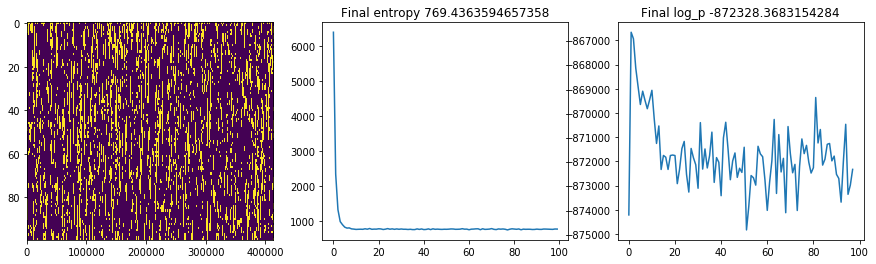

' oralte r nativelyas o p posin gautho rityinthe cond uctof huma nrela t ionspr oponen tsofanarchi smk nownasa narchistsa dv o cates tatel esssoc i etiesast heon l ymora lformo fsoc ialorg anizationthere areman ytype s andtrad itions ofanarchi smn o tallof whichare m utual lyexcl usiveanarch istschoo lsofth oughtca ndifferf und amentall ysupp orting anythi n gfro mext remein d ividual ismtoco mpletecolle ctivismanarchi smiso ftenc onsideredtobe aradic allef tw i n gid eolo g yandmu c hofa narchistec onomics a ndanarchistle galphiloso p hyref l ecta ntistati stinte rpretations ofcomm unism collect ivism syndic alismor partici pato ryeco nomicsh oweveranarc hismhasa lwaysincl udeda nindivi dualist s tr ainsu pportin gamar k et econom yandpriv atepro pert y ormor allyunres train edego ismsomei ndivi d ualistanarc histsar e alsoso cial istso rcomm un ists w hiles omeanar chocom m unistsa realsoin dividualistso regois tswh ilesome a n archoc ommunist sareal soindi vidua listsanar chisma sas

In [6]:
data = segmentation.load_data(strip_unicode=False)

model = segmentation.Model(alpha = 4000, p_c = 0.4)
model.fit(data, num_iter = 100)
model.plot_results()